### Importación de datos



In [15]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [16]:
ingreso_tienda_1 = tienda["Precio"].sum()
ingreso_tienda_2 = tienda2["Precio"].sum()
ingreso_tienda_3 = tienda3["Precio"].sum()
ingreso_tienda_4 = tienda4["Precio"].sum()

print("Ingreso total Tienda 1:", ingreso_tienda_1)
print("Ingreso total Tienda 2:", ingreso_tienda_2)
print("Ingreso total Tienda 3:", ingreso_tienda_3)
print("Ingreso total Tienda 4:", ingreso_tienda_4)



Ingreso total Tienda 1: 1150880400.0
Ingreso total Tienda 2: 1116343500.0
Ingreso total Tienda 3: 1098019600.0
Ingreso total Tienda 4: 1038375700.0


Los resultados muestran que la Tienda 1 es la que genera mayores ingresos, mientras que la Tienda 4 presenta el ingreso total más bajo, lo que indica un menor desempeño financiero en comparación con las demás tiendas.

# 2. Ventas por categoría

In [17]:
ventas_categoria_t1 = (
    tienda.groupby("Categoría del Producto")
    .size()
    .sort_values(ascending=False)
)

ventas_categoria_t2 = (
    tienda2.groupby("Categoría del Producto")
    .size()
    .sort_values(ascending=False)
)

ventas_categoria_t3 = (
    tienda3.groupby("Categoría del Producto")
    .size()
    .sort_values(ascending=False)
)

ventas_categoria_t4 = (
    tienda4.groupby("Categoría del Producto")
    .size()
    .sort_values(ascending=False)
)

ventas_categoria_t1


,0
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


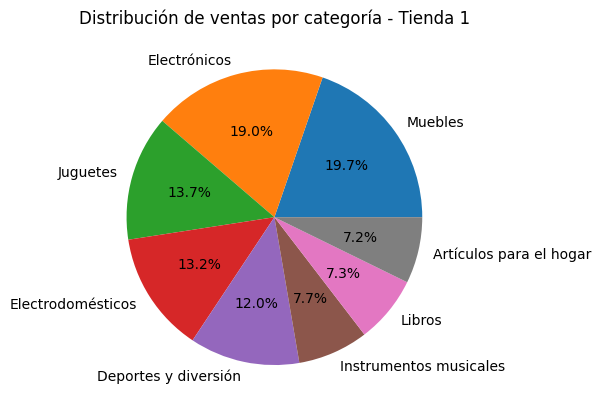

In [30]:
plt.figure()
ventas_categoria_t1.plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Distribución de ventas por categoría - Tienda 1"
)
plt.ylabel("")
plt.show()


<Axes: title={'center': 'Ventas por categoría - Tienda 1'}, xlabel='Categoría del Producto'>

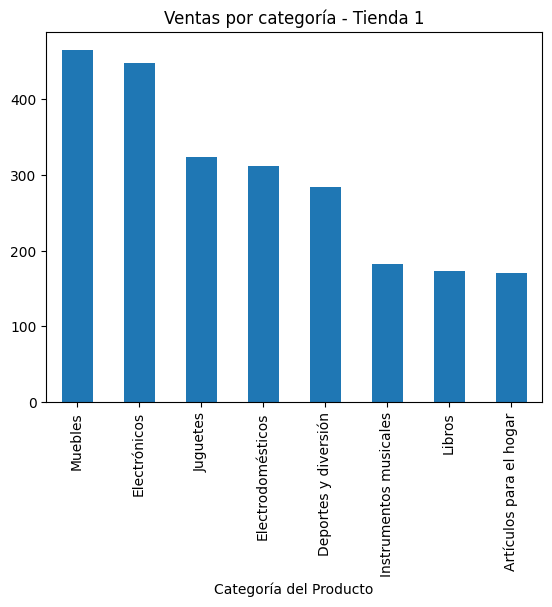

In [18]:
ventas_categoria_t1.plot(kind="bar", title="Ventas por categoría - Tienda 1")


Los resultados permiten identificar que las categorías más populares en cada tienda, son Muebles y Electrónicos.

# 3. Calificación promedio de la tienda


In [19]:
calif_t1 = tienda["Calificación"].mean()
calif_t2 = tienda2["Calificación"].mean()
calif_t3 = tienda3["Calificación"].mean()
calif_t4 = tienda4["Calificación"].mean()

print("Calificación Tienda 1:", round(calif_t1, 2))
print("Calificación Tienda 2:", round(calif_t2, 2))
print("Calificación Tienda 3:", round(calif_t3, 2))
print("Calificación Tienda 4:", round(calif_t4, 2))

Calificación Tienda 1: 3.98
Calificación Tienda 2: 4.04
Calificación Tienda 3: 4.05
Calificación Tienda 4: 4.0


Los resultados indican que la Tienda 3 presenta el mayor nivel de satisfacción, mientras que la Tienda 1 obtiene la calificación promedio más baja. No obstante, todas las tiendas mantienen valores cercanos a 4, lo que refleja una percepción generalmente positiva por parte de los clientes.

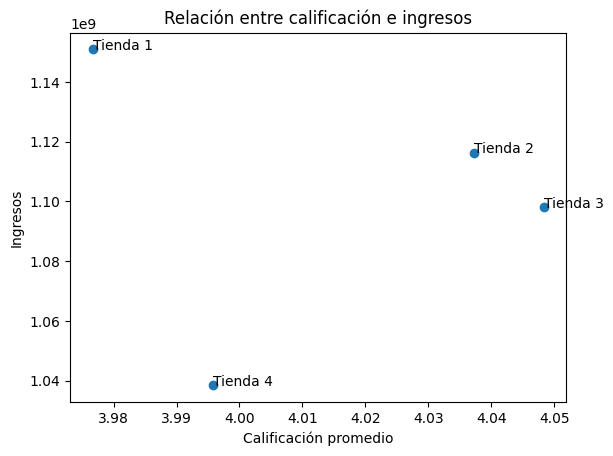

In [34]:
calificaciones = [calif_t1, calif_t2, calif_t3, calif_t4]
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure()
plt.scatter(calificaciones, ingresos)

for i, tienda in enumerate(tiendas):
    plt.text(calificaciones[i], ingresos[i], tienda)

plt.title("Relación entre calificación e ingresos")
plt.xlabel("Calificación promedio")
plt.ylabel("Ingresos")
plt.show()


# 4. Productos más y menos vendidos

In [20]:
productos_tienda_1 = (
    tienda
    .groupby("Producto")
    .size()
    .sort_values(ascending=False)
)

producto_mas_vendido_1 = productos_tienda_1.head(1)
producto_menos_vendido_1 = productos_tienda_1.tail(1)

producto_mas_vendido_1, producto_menos_vendido_1


(Producto
 Armario    60
 dtype: int64,
 Producto
 Auriculares con micrófono    33
 dtype: int64)

In [21]:
productos_tienda_2 = (
    tienda2
    .groupby("Producto")
    .size()
    .sort_values(ascending=False)
)

producto_mas_vendido_2 = productos_tienda_2.head(1)
producto_menos_vendido_2 = productos_tienda_2.tail(1)

producto_mas_vendido_2, producto_menos_vendido_2


(Producto
 Iniciando en programación    65
 dtype: int64,
 Producto
 Juego de mesa    32
 dtype: int64)

In [38]:
productos_tienda_3 = (
    tienda3
    .groupby("Producto")
    .size()
    .sort_values(ascending=False)
)

producto_mas_vendido_3 = productos_tienda_3.head(1)
producto_menos_vendido_3 = productos_tienda_3.tail(1)

producto_mas_vendido_3, producto_menos_vendido_3


(Producto
 Kit de bancas    57
 dtype: int64,
 Producto
 Bloques de construcción    35
 dtype: int64)

In [23]:
productos_tienda_4 = (
    tienda4
    .groupby("Producto")
    .size()
    .sort_values(ascending=False)
)

producto_mas_vendido_4 = productos_tienda_4.head(1)
producto_menos_vendido_4 = productos_tienda_4.tail(1)

producto_mas_vendido_4, producto_menos_vendido_4


(Producto
 Cama box    62
 dtype: int64,
 Producto
 Guitarra eléctrica    33
 dtype: int64)

# 5. Envío promedio por tienda

In [24]:
envio_t1 = tienda["Costo de envío"].mean()
envio_t2 = tienda2["Costo de envío"].mean()
envio_t3 = tienda3["Costo de envío"].mean()
envio_t4 = tienda4["Costo de envío"].mean()

print("Envío promedio Tienda 1:", round(envio_t1, 2))
print("Envío promedio Tienda 2:", round(envio_t2, 2))
print("Envío promedio Tienda 3:", round(envio_t3, 2))
print("Envío promedio Tienda 4:", round(envio_t4, 2))


Envío promedio Tienda 1: 26018.61
Envío promedio Tienda 2: 25216.24
Envío promedio Tienda 3: 24805.68
Envío promedio Tienda 4: 23459.46


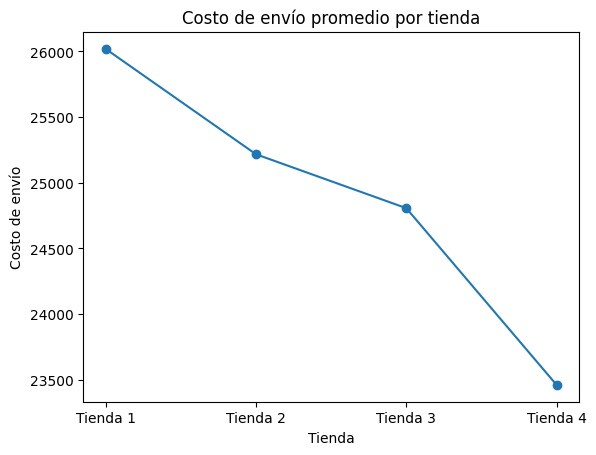

In [35]:
envios = [envio_t1, envio_t2, envio_t3, envio_t4]
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure()
plt.plot(tiendas, envios, marker="o")
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío")
plt.show()
